<a href="https://www.kaggle.com/code/shiviyadav/predicting-the-prices-using-all-regression-model?scriptVersionId=105824983" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avocado-prices/avocado.csv


# 1.Import the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

# 2.Load the dataset

In [3]:
data = pd.read_csv('/kaggle/input/avocado-prices/avocado.csv')

# 3.Display and Analyse the dataset 

In [4]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


In [6]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
data.shape

(18249, 14)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


There are 3 categorical features and no missing value. Let's explore the data further.

In [9]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


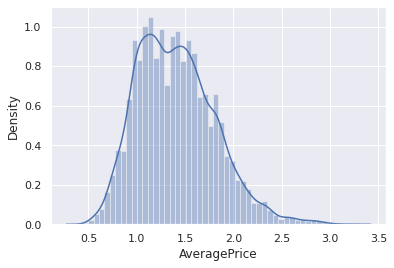

In [10]:
# Plotting the distplot for average price
sns.distplot(data['AveragePrice']);

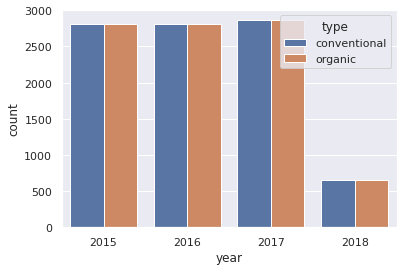

In [11]:
sns.countplot(x='year',data=data,hue='type');

There are 2 types - organic and conventional with respect to years 2015,2016,2017,2018.There are almost equal numbers of conventional and organic avacados.Though, there is very less observations in the year 2018.

In [12]:
data.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

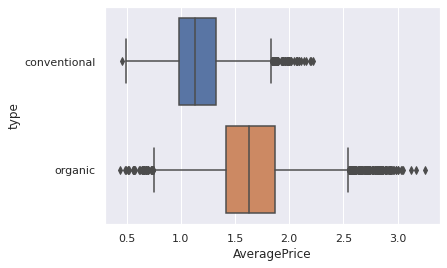

In [13]:
sns.boxplot(y="type", x="AveragePrice", data=data);


Organic avocados are more expensive. This is obvious, because their cultivation is more expensive 

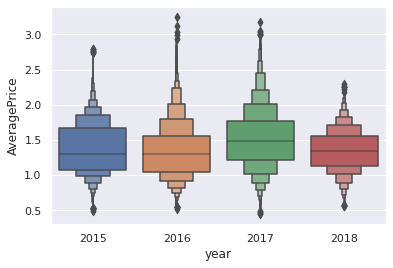

In [14]:
data.year=data.year.apply(str)
sns.boxenplot(x="year", y="AveragePrice", data=data);

Insights:
Avacados were slightly more expensive in the year 2017.

# Dealing with categorical features

In [15]:
data['type']=data['type'].map({'conventional':0,'organic':1})

# Extracting # month from date column.
data.Date = data.Date.apply(pd.to_datetime)
data['Month']=data['Date'].apply(lambda x:x.month)
data.drop('Date',axis=1,inplace=True)
data.Month = data.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

Text(0.5, 1.0, 'Monthwise Distribution of Sales')

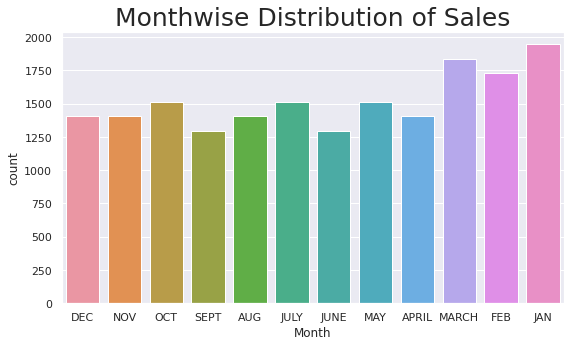

In [16]:
plt.figure(figsize=(9,5))
sns.countplot(data['Month'])
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25})

Insights: It implies that sales of avacado see a rise in January, Febuary and March

# Preparing data for ML models

In [17]:
# Creating dummy variables
dummies = pd.get_dummies(data[['year','region','Month']],drop_first=True)
df_dummies = pd.concat([data[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)

In [18]:
target = data['AveragePrice']

In [19]:
# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,target,test_size=0.30)

In [20]:
# Standardizing the data
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[cols_to_std])

StandardScaler()

In [21]:
X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

In [22]:
#importing ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Linear Regression

In [23]:
Lin_reg = LinearRegression()  
Lin_reg.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [24]:
y_predL = Lin_reg.predict(X_test)

In [25]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predL))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predL))  
print('Root Mean Squared Error:', r2_score(y_test, y_predL))

Mean Absolute Error: 0.17990128966633956
Mean Squared Error: 0.05575308996287773
Root Mean Squared Error: 0.6517233515232976


# Decision Tree Regressor

In [26]:
# create a regressor object
DT_reg= DecisionTreeRegressor(random_state = 0)
DT_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [27]:
y_predD = DT_reg.predict(X_test)

In [28]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predD))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predD))  
print('Root Mean Squared Error:', r2_score(y_test, y_predD))

Mean Absolute Error: 0.12829954337899543
Mean Squared Error: 0.03969172602739726
Root Mean Squared Error: 0.7520549744905314


# Random Forest Regressor

In [29]:
# create regressor object
Rf_reg = RandomForestRegressor(random_state = 0)
  
# fit the regressor with x and y data
Rf_reg.fit(X_train, y_train)  

RandomForestRegressor(random_state=0)

In [30]:
y_predR = Rf_reg.predict(X_test)

In [31]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predR))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predR))  
print('Root Mean Squared Error:', r2_score(y_test, y_predR))

Mean Absolute Error: 0.09389996347031963
Mean Squared Error: 0.018101151475799087
Root Mean Squared Error: 0.8869262963943707


# Support Vector Machine (SVM Regressor)

In [32]:
# import the model
from sklearn.svm import SVR
# create the model object
SV_reg = SVR(gamma=1)

In [33]:
# fit the model on the data
SV_reg.fit(X_train, y_train)

SVR(gamma=1)

In [34]:
y_predS = SV_reg.predict(X_test)

In [35]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predS))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predS))  
print('Root Mean Squared Error:', r2_score(y_test, y_predS))

Mean Absolute Error: 0.11644016948439781
Mean Squared Error: 0.02684809364662527
Root Mean Squared Error: 0.8322861732065215


# KNN Regressor

In [36]:
KNN_reg = KNeighborsRegressor(n_neighbors=1)
# fit the model using the training data and training targets
KNN_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [37]:
y_predK = KNN_reg.predict(X_test)

In [38]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predK))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predK))  
print('Root Mean Squared Error:', r2_score(y_test, y_predK))

Mean Absolute Error: 0.0984675799086758
Mean Squared Error: 0.02266036529680365
Root Mean Squared Error: 0.8584459429229239


# XGBoost Regressor

In [39]:
XGB_reg = XGBRegressor()
# fit the model using the training data and training targets
XGB_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [40]:
y_predX =XGB_reg.predict(X_test)

In [41]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predX))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predX))  
print('Root Mean Squared Error:', r2_score(y_test, y_predX))

Mean Absolute Error: 0.09254581003624555
Mean Squared Error: 0.016632180885977295
Root Mean Squared Error: 0.8961026156633947


# Summary of all regression algorithms performance

In [42]:
results= pd.DataFrame(columns=['MAE','MSE','R2-score'])

In [43]:
results.loc['LinearRegression']=[mean_absolute_error(y_test,y_predL),mean_squared_error(y_test,y_predL),r2_score(y_test,y_predL)]
results.loc['DecisionTreeRegressor']=[mean_absolute_error(y_test,y_predD),mean_squared_error(y_test,y_predD),r2_score(y_test,y_predD)]
results.loc['Random Forest']=[mean_absolute_error(y_test,y_predR),mean_squared_error(y_test,y_predR),r2_score(y_test,y_predR)]
results.loc['Support Vector Machines']=[mean_absolute_error(y_test,y_predS),mean_squared_error(y_test,y_predS),r2_score(y_test,y_predS)]
results.loc['K-nearest Neighbors']=[mean_absolute_error(y_test,y_predK),mean_squared_error(y_test,y_predK),r2_score(y_test,y_predK)]
results.loc['XGBoost']=[mean_absolute_error(y_test,y_predX),mean_squared_error(y_test,y_predX),r2_score(y_test,y_predX)]


In [44]:
results

,MAE,MSE,R2-score
LinearRegression,0.179901,0.055753,0.651723
DecisionTreeRegressor,0.128300,0.039692,0.752055
Random Forest,0.093900,0.018101,0.886926
Support Vector Machines,0.116440,0.026848,0.832286
K-nearest Neighbors,0.098468,0.022660,0.858446
XGBoost,0.092546,0.016632,0.896103


In [45]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

,MAE,MSE,R2-score
XGBoost,0.092546,0.016632,0.896103
Random Forest,0.093900,0.018101,0.886926
K-nearest Neighbors,0.098468,0.022660,0.858446
Support Vector Machines,0.116440,0.026848,0.832286
DecisionTreeRegressor,0.128300,0.039692,0.752055
LinearRegression,0.179901,0.055753,0.651723


# Conclusion:

Except linear regression model, all other models have mean absolute error less than 10% of mean of target variable.

For this dataset, XGBoost and Random Forest algorithms have shown best results.